In [4]:
#load the libraries 
import numpy as np 
import pandas as pd

In [5]:
data1=pd.read_csv('C:/Users/ASUS/Documents/data_clean.csv')

In [6]:
data1.tail(10)

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
148,149,30.0,193.0,6.9,70,9,26,2010,70,C
149,150,NaN,145.0,13.2,77,9,27,2010,77,PS
150,151,14.0,191.0,14.3,75,9,28,2010,75,S
151,152,18.0,131.0,8.0,76,9,29,2010,76,PS
152,153,20.0,223.0,11.5,68,9,30,2010,68,S
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S
157,158,18.0,131.0,8.0,76,9,29,2010,76,C


In [7]:
data1.shape

(158, 10)

In [11]:
#data conversation
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [5]:
data2=data1

In [6]:
data=data2.copy()

In [7]:
data['Month']=pd.to_numeric(data['Month'],errors='coerce')

In [8]:
data['Temp C']=pd.to_numeric(data['Temp C'],errors='coerce')

In [9]:
data['Weather']=data['Weather'].astype('category')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  158 non-null    int64   
 1   Ozone       120 non-null    float64 
 2   Solar.R     151 non-null    float64 
 3   Wind        158 non-null    float64 
 4   Temp C      157 non-null    float64 
 5   Month       157 non-null    float64 
 6   Day         158 non-null    int64   
 7   Year        158 non-null    int64   
 8   Temp        158 non-null    int64   
 9   Weather     155 non-null    category
dtypes: category(1), float64(5), int64(4)
memory usage: 11.5 KB


In [19]:
#DUPLICATES

In [11]:
#count of duplicate rows 
data[data.duplicated()].shape

(0, 10)

In [12]:
#print the duplicate row 
data[data.duplicated()]

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather


In [13]:
data_cleaned1=data.drop_duplicates()

In [14]:
data_cleaned1.shape

(158, 10)

In [15]:
#drop column
data_cleaned2=data_cleaned1.drop('Temp C',axis=1)

In [16]:
#rename coloum
data_cleaned3=data_cleaned2.rename({'Solar.R':'Solar'},axis=1)

In [17]:
data_cleaned3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  158 non-null    int64   
 1   Ozone       120 non-null    float64 
 2   Solar       151 non-null    float64 
 3   Wind        158 non-null    float64 
 4   Month       157 non-null    float64 
 5   Day         158 non-null    int64   
 6   Year        158 non-null    int64   
 7   Temp        158 non-null    int64   
 8   Weather     155 non-null    category
dtypes: category(1), float64(4), int64(4)
memory usage: 11.4 KB


<AxesSubplot:>

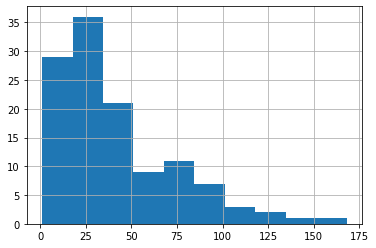

In [18]:
#OUTLIERS
data_cleaned3['Ozone'].hist()

<AxesSubplot:>

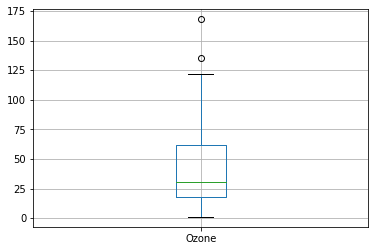

In [33]:
data_cleaned3.boxplot(column=['Ozone'])

In [19]:
data_cleaned3['Ozone'].describe()

count    120.000000
mean      41.583333
std       32.620709
min        1.000000
25%       18.000000
50%       30.500000
75%       61.500000
max      168.000000
Name: Ozone, dtype: float64

In [20]:
data_cleaned3.shape

(158, 9)

In [21]:
import seaborn as sns
cols=data_cleaned3.columns
colours=['#000099','#ffff00']


<AxesSubplot:>

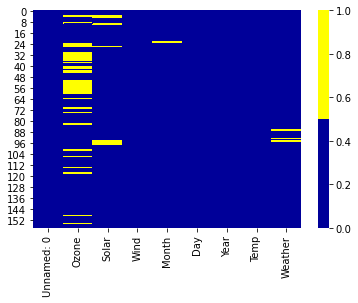

In [27]:
sns.heatmap(data_cleaned3[cols].isnull(),
            cmap=sns.color_palette(colours))


In [28]:
data_cleaned3[data_cleaned3.isnull().any(axis=1)].head()

,Unnamed: 0,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
4,5,NaN,NaN,14.3,5.0,5,2010,56,S
5,6,28.0,NaN,14.9,5.0,6,2010,66,C
9,10,NaN,194.0,8.6,5.0,10,2010,69,S
10,11,7.0,NaN,6.9,5.0,11,2010,74,C
23,24,32.0,92.0,12.0,NaN,24,2010,61,C


In [29]:
data_cleaned3.isnull().sum()

Unnamed: 0     0
Ozone         38
Solar          7
Wind           0
Month          1
Day            0
Year           0
Temp           0
Weather        3
dtype: int64

In [31]:
data_cleaned3[data_cleaned3.isnull().any(axis=1)].head()

,Unnamed: 0,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
4,5,NaN,NaN,14.3,5.0,5,2010,56,S
5,6,28.0,NaN,14.9,5.0,6,2010,66,C
9,10,NaN,194.0,8.6,5.0,10,2010,69,S
10,11,7.0,NaN,6.9,5.0,11,2010,74,C
23,24,32.0,92.0,12.0,NaN,24,2010,61,C


In [33]:
#MEAN IMPUTATION
mean=data_cleaned3['Ozone'].mean()
print(mean)

41.583333333333336


In [34]:
data_cleaned3['Ozone']=data_cleaned3['Ozone'].fillna(mean)

In [35]:
data_cleaned3

,Unnamed: 0,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,1,41.000000,190.0,7.4,5.0,1,2010,67,S
1,2,36.000000,118.0,8.0,5.0,2,2010,72,C
2,3,12.000000,149.0,12.6,5.0,3,2010,74,PS
3,4,18.000000,313.0,11.5,5.0,4,2010,62,S
4,5,41.583333,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
153,154,41.000000,190.0,7.4,5.0,1,2010,67,C
154,155,30.000000,193.0,6.9,9.0,26,2010,70,PS
155,156,41.583333,145.0,13.2,9.0,27,2010,77,S
156,157,14.000000,191.0,14.3,9.0,28,2010,75,S


In [38]:
#missing value imputation for categorical value
#get the object columns.
obj_columns=data_cleaned3[['Weather']]
obj_columns.isnull().sum()

Weather    3
dtype: int64

In [37]:
obj_columns.isnull().sum()

Weather    3
dtype: int64

In [40]:
#Missing value imputation for categorical value
obj_columns=obj_columns.fillna(obj_columns.mode().iloc[0])

In [41]:
obj_columns.isnull().sum()

Weather    0
dtype: int64

In [42]:
obj_columns.shape

(158, 1)

In [43]:
#Join the data set with imputed object dataset
data_cleaned4=pd.concat([data_cleaned3,obj_columns],axis=1)

In [45]:
data_cleaned4.isnull().sum()

Unnamed: 0    0
Ozone         0
Solar         7
Wind          0
Month         1
Day           0
Year          0
Temp          0
Weather       3
Weather       0
dtype: int64

In [46]:
import seaborn as sns

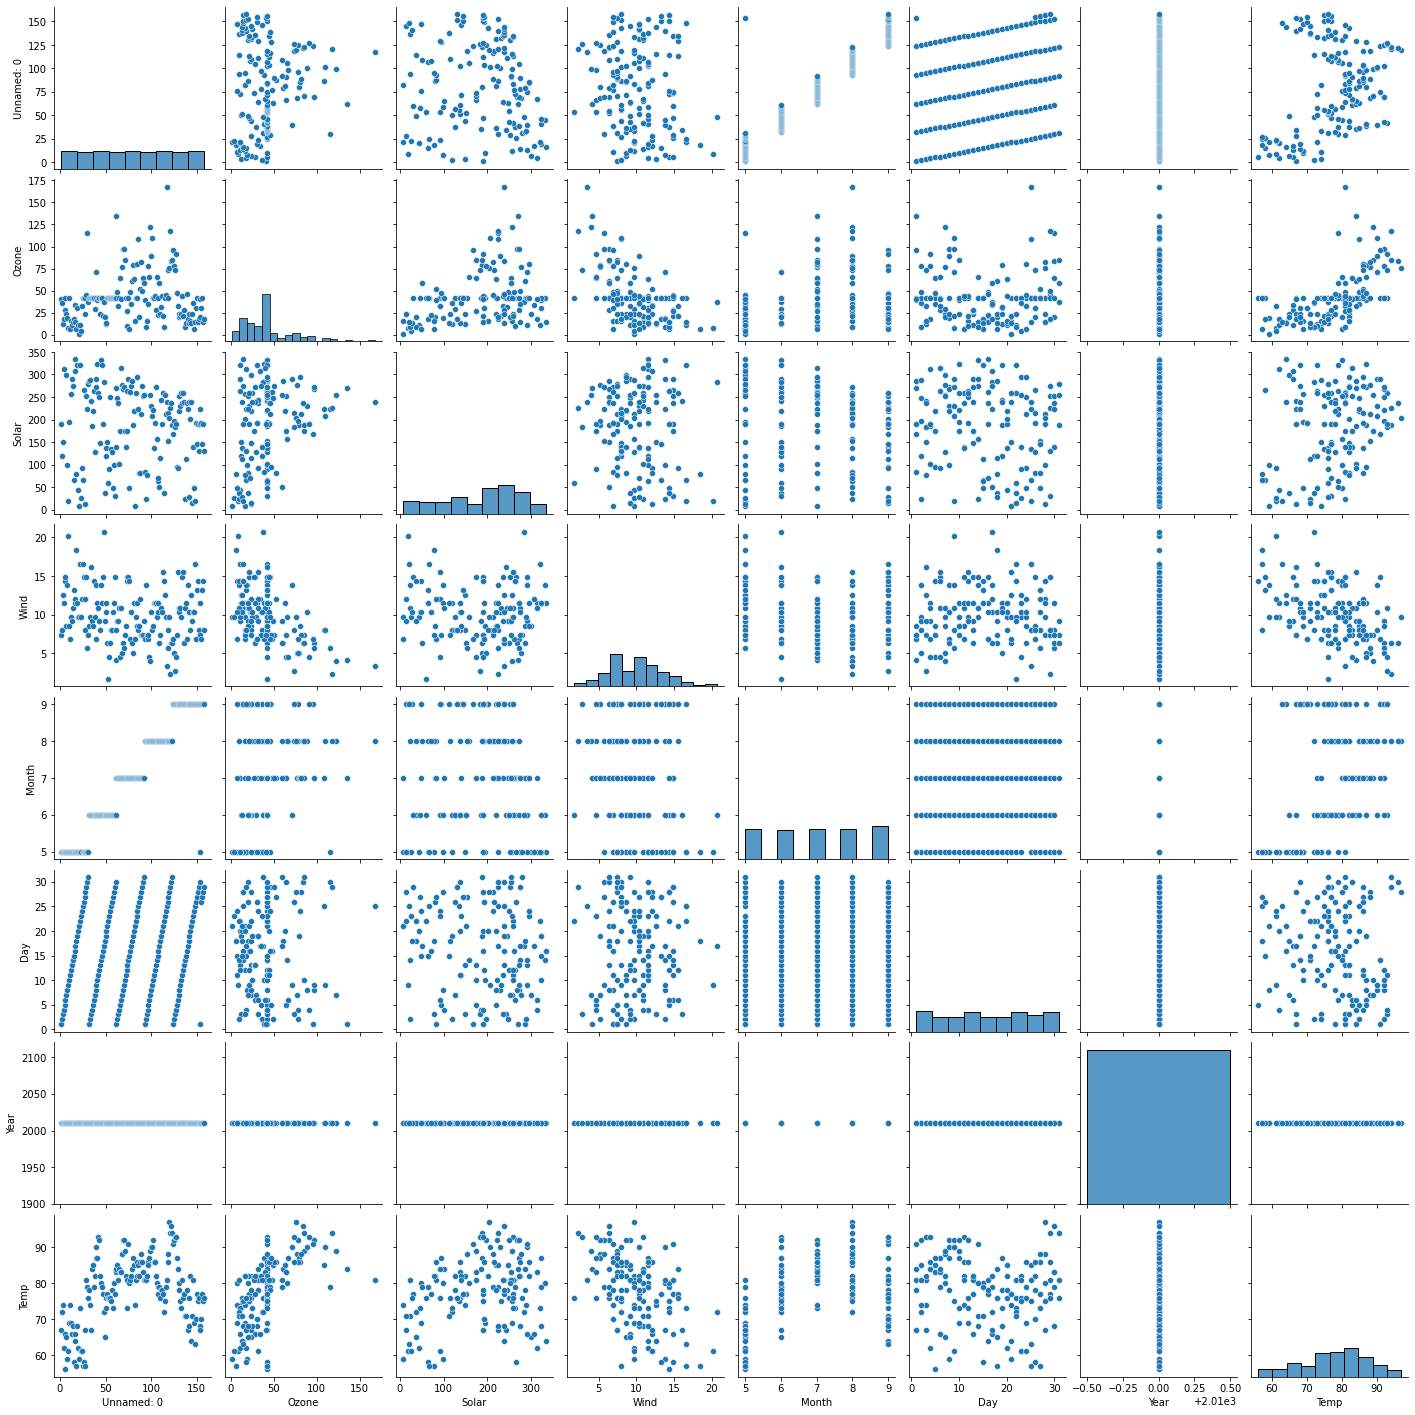

In [47]:
#Create the default pairplot
sns.pairplot(data_cleaned3)

In [51]:
#CORRELLATION
data_cleaned3.corr()

,Unnamed: 0,Ozone,Solar,Wind,Month,Day,Year,Temp
Unnamed: 0,1.000000,0.111910,-0.109520,-0.158309,0.949690,0.216219,NaN,0.337537
Ozone,0.111910,1.000000,0.307253,-0.523806,0.123962,-0.030241,NaN,0.606275
Solar,-0.109520,0.307253,1.000000,-0.056594,-0.092918,-0.154212,NaN,0.273322
Wind,-0.158309,-0.523806,-0.056594,1.000000,-0.153507,0.040151,NaN,-0.441247
Month,0.949690,0.123962,-0.092918,-0.153507,1.000000,0.061236,NaN,0.393321
Day,0.216219,-0.030241,-0.154212,0.040151,0.061236,1.000000,NaN,-0.124538
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp,0.337537,0.606275,0.273322,-0.441247,0.393321,-0.124538,NaN,1.000000


In [52]:
#TRANSFORMATION
data_cleaned4

,Unnamed: 0,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Weather
0,1,41.000000,190.0,7.4,5.0,1,2010,67,S,S
1,2,36.000000,118.0,8.0,5.0,2,2010,72,C,C
2,3,12.000000,149.0,12.6,5.0,3,2010,74,PS,PS
3,4,18.000000,313.0,11.5,5.0,4,2010,62,S,S
4,5,41.583333,NaN,14.3,5.0,5,2010,56,S,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.000000,190.0,7.4,5.0,1,2010,67,C,C
154,155,30.000000,193.0,6.9,9.0,26,2010,70,PS,PS
155,156,41.583333,145.0,13.2,9.0,27,2010,77,S,S
156,157,14.000000,191.0,14.3,9.0,28,2010,75,S,S


In [53]:
#Create dummy vaeriable for Weather
data_cleaned4=pd.get_dummies(data,columns=['Weather'])

In [54]:
data_cleaned4=data_cleaned4.dropna()

In [55]:
data_cleaned4

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
0,1,41.0,190.0,7.4,67.0,5.0,1,2010,67,0,0,1
1,2,36.0,118.0,8.0,72.0,5.0,2,2010,72,1,0,0
2,3,12.0,149.0,12.6,74.0,5.0,3,2010,74,0,1,0
3,4,18.0,313.0,11.5,62.0,5.0,4,2010,62,0,0,1
6,7,23.0,299.0,8.6,65.0,5.0,7,2010,65,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
152,153,20.0,223.0,11.5,68.0,9.0,30,2010,68,0,0,1
153,154,41.0,190.0,7.4,67.0,5.0,1,2010,67,1,0,0
154,155,30.0,193.0,6.9,70.0,9.0,26,2010,70,0,1,0
156,157,14.0,191.0,14.3,75.0,9.0,28,2010,75,0,0,1


In [58]:
#NORMALIZATION
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [59]:
data_cleaned4.values

array([[  1.,  41., 190., ...,   0.,   0.,   1.],
       [  2.,  36., 118., ...,   1.,   0.,   0.],
       [  3.,  12., 149., ...,   0.,   1.,   0.],
       ...,
       [155.,  30., 193., ...,   0.,   1.,   0.],
       [157.,  14., 191., ...,   0.,   0.,   1.],
       [158.,  18., 131., ...,   1.,   0.,   0.]])

In [60]:
array=data_cleaned4.values

In [61]:
scaler=MinMaxScaler(feature_range=(0,1))
rescaledX=scaler.fit_transform(array)

In [63]:
#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[0.   0.24 0.56 0.28 0.25 0.   0.   0.   0.25 0.   0.   1.  ]
 [0.01 0.21 0.34 0.31 0.38 0.   0.03 0.   0.38 1.   0.   0.  ]
 [0.01 0.07 0.43 0.56 0.43 0.   0.07 0.   0.43 0.   1.   0.  ]
 [0.02 0.1  0.94 0.5  0.12 0.   0.1  0.   0.12 0.   0.   1.  ]
 [0.04 0.13 0.89 0.34 0.2  0.   0.2  0.   0.2  0.   1.   0.  ]]


In [66]:
#STANDARDIZE DATA
from sklearn.preprocessing import StandardScaler

In [67]:
array=data_cleaned4.values

In [69]:
scaler=StandardScaler().fit(array)
rescaledX=scaler.transform(array)

In [71]:
#summarize transformed data 
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[-1.84 -0.02  0.05 -0.71 -1.15 -1.53 -1.7   0.   -1.15 -0.64 -0.68  1.28]
 [-1.82 -0.17 -0.75 -0.54 -0.62 -1.53 -1.59  0.   -0.62  1.57 -0.68 -0.78]
 [-1.8  -0.9  -0.41  0.77 -0.4  -1.53 -1.48  0.   -0.4  -0.64  1.47 -0.78]
 [-1.78 -0.72  1.43  0.45 -1.69 -1.53 -1.36  0.   -1.69 -0.64 -0.68  1.28]
 [-1.71 -0.57  1.27 -0.37 -1.37 -1.53 -1.02  0.   -1.37 -0.64  1.47 -0.78]]


In [72]:
#SPEED UP THE EDA PROCESS

In [73]:
!pip install pandas-profiling==2.7.1
!pip install sweetviz

  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=e478d9a8941d39551807e194d4a2dd65229fbca30897033b4679d685d5d374f1
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295198 sha256=a3e2e8ee13c0e53d99d9ea3390b2e87091daef5666b1f9aba280cd792cedf281
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\48\a1\7f\096c1269d6bf78d4768180602579b35a1e8cb1250bb4b40c74
Successfully built htmlmin imagehash


In [1]:
import pandas_profiling as pp
import sweetviz as sv

In [8]:
EDA_report=pp.ProfileReport(data1)
EDA_report.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\ASUS\anaconda3\lib\site-packages\pandas_profiling\visualisation\plot.py:166: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
sweet_report=sv.analyze(data1)
sweet_report.show_html('weather_report.html')                            

                                             |          | [  0%]   00:00 -> (? left)

Report weather_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
